In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os

Mounted at /content/drive


In [2]:
#Sam: 'Class/Fourth Year classes/EECS 448/Project 448/Environment'
#Ammar: 'Classes Winter 2023/EECS 448 /Project 448/Environment'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Classes Winter 2023/EECS 448 /Project 448/Environment'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
print(GOOGLE_DRIVE_PATH)
# Load the autoreload extension
%load_ext autoreload
%autoreload 2
import sys
sys.path.append(GOOGLE_DRIVE_PATH)


['GPT-wiki-intro.csv', 'Baseline.ipynb', 'Baseline_2', 'torch_embeddings_train.pt', 'torch_embeddings_test.pt', 'xgboost_model_embeddings.model', 'xgboost_model_extracted_features.model', 'extracted_features_train.csv', 'extracted_features_test.csv', 'glued_test.csv', 'glued_train.csv', 'xgboost_model_combined.model', 'y_train.csv', 'y_test.csv', 'Notebook.ipynb', 'PyCaret.ipynb']
drive/My Drive/Classes Winter 2023/EECS 448 /Project 448/Environment


In [4]:
!pip install joblib=1.1.0
!pip install pycaret


ERROR: Invalid requirement: 'joblib=1.1.0'
Hint: = is not a valid operator. Did you mean == ?
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import pandas as pd
# load y_train and y_test dataframes from the CSV files with index
y_train = pd.read_csv(GOOGLE_DRIVE_PATH+'/y_train.csv', index_col=0)
y_test = pd.read_csv(GOOGLE_DRIVE_PATH+'/y_test.csv', index_col=0)

glued_train = pd.read_csv(GOOGLE_DRIVE_PATH +  '/glued_train.csv')
glued_test = pd.read_csv(GOOGLE_DRIVE_PATH +  '/glued_test.csv')

<bound method NDFrame.head of      Unnamed: 0         0         1         2         3         4         5  \
464         464 -0.097024  0.068364  0.027800 -0.075819  0.059304 -0.124141   
536         536 -0.043532  0.050205  0.005957 -0.108540  0.040418 -0.085582   
386         386 -0.088446  0.010350 -0.013224 -0.076912  0.048568 -0.149024   
603         603 -0.039711  0.040020  0.000270 -0.099659 -0.019214 -0.142650   
733         733 -0.049104  0.025975  0.003965 -0.115081  0.029022 -0.179896   
..          ...       ...       ...       ...       ...       ...       ...   
620         620 -0.079094  0.017007 -0.022852 -0.131888  0.025005 -0.137850   
625         625 -0.062702  0.016368 -0.027186 -0.083763  0.057724 -0.093945   
9             9 -0.050942  0.079512  0.016972 -0.094522  0.083884 -0.095710   
269         269 -0.086996 -0.025948  0.003461 -0.096122  0.052971 -0.096174   
218         218 -0.025757  0.052876 -0.036755 -0.093683  0.031962 -0.106915   

            6        

,Description,Value
0,Session id,2325
1,Target,label
2,Target type,Binary
3,Original data shape,"(750, 773)"
4,Transformed data shape,"(750, 773)"
5,Transformed train set shape,"(525, 773)"
6,Transformed test set shape,"(225, 773)"
7,Numeric features,772
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7840
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2800
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9920
dt,Decision Tree Classifier,0.9981,0.9981,1.0000,0.9963,0.9981,0.9962,0.9962,0.2540
ada,Ada Boost Classifier,0.9981,0.9981,1.0000,0.9963,0.9981,0.9962,0.9962,0.4130
gbc,Gradient Boosting Classifier,0.9981,0.9981,1.0000,0.9963,0.9981,0.9962,0.9962,2.8550
lightgbm,Light Gradient Boosting Machine,0.9981,0.9981,1.0000,0.9963,0.9981,0.9962,0.9962,1.6100
ridge,Ridge Classifier,0.9905,0.0000,0.9846,0.9962,0.9903,0.9809,0.9811,0.5470
rf,Random Forest Classifier,0.9694,0.9961,0.9506,0.9887,0.9687,0.9389,0.9406,0.9260
et,Extra Trees Classifier,0.9427,0.9818,0.9238,0.9617,0.9415,0.8855,0.8875,0.8330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', '0', '1', '2', '3',
                                              '4', '5', '6', '7', '8', '9', '10',
                                              '11', '12', '13', '14', '15', '16',
                                              '17', '18', '19', '20', '21', '22',
                                              '23', '24', '25', '26', '27', '28', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_emp...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanColumnNames(m

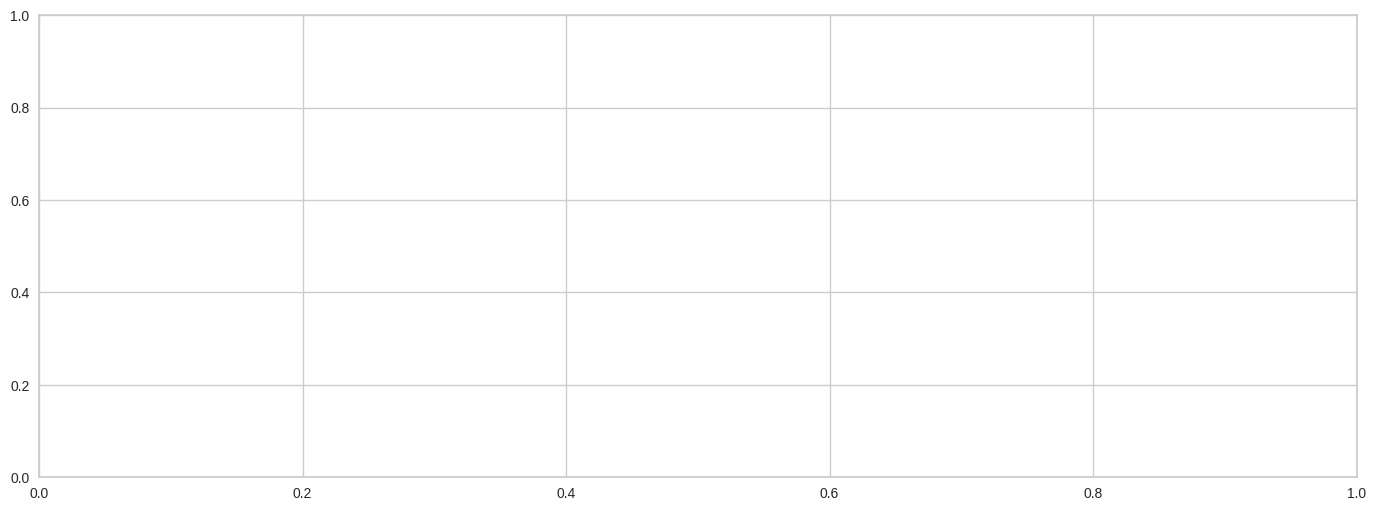

In [19]:
# import classification module
from pycaret.classification import *
# set to proper index
glued_train = glued_train.set_index(y_train.index)
train_df = pd.concat([glued_train, y_train], axis=1)
glued_test = glued_test.set_index(y_test.index)
test_df = pd.concat([glued_test, y_test], axis=1)
data = pd.concat([train_df, test_df], axis=0)


# setup the experiment
exp = setup(data, target='label')

# compare the performance of different models
best_model = compare_models()

# tune hyperparameters of the best model
tuned_model = tune_model(best_model)

test_results = evaluate_model(tuned_model)
# save the best performing model
save_model(tuned_model, GOOGLE_DRIVE_PATH+"/best_model")